# Lab 6


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import fetch_olivetti_faces
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.svm import SVC

## Problem 1

### Preprocessing

In [3]:
columns = ["ID","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',names = columns)
dataset

ID       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 11 columns]

In [ ]:
for i in columns:
  print(dataset[i].isnull().values.any())
dataset.info()

False
False
False
False
False
False
False
False
False
False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


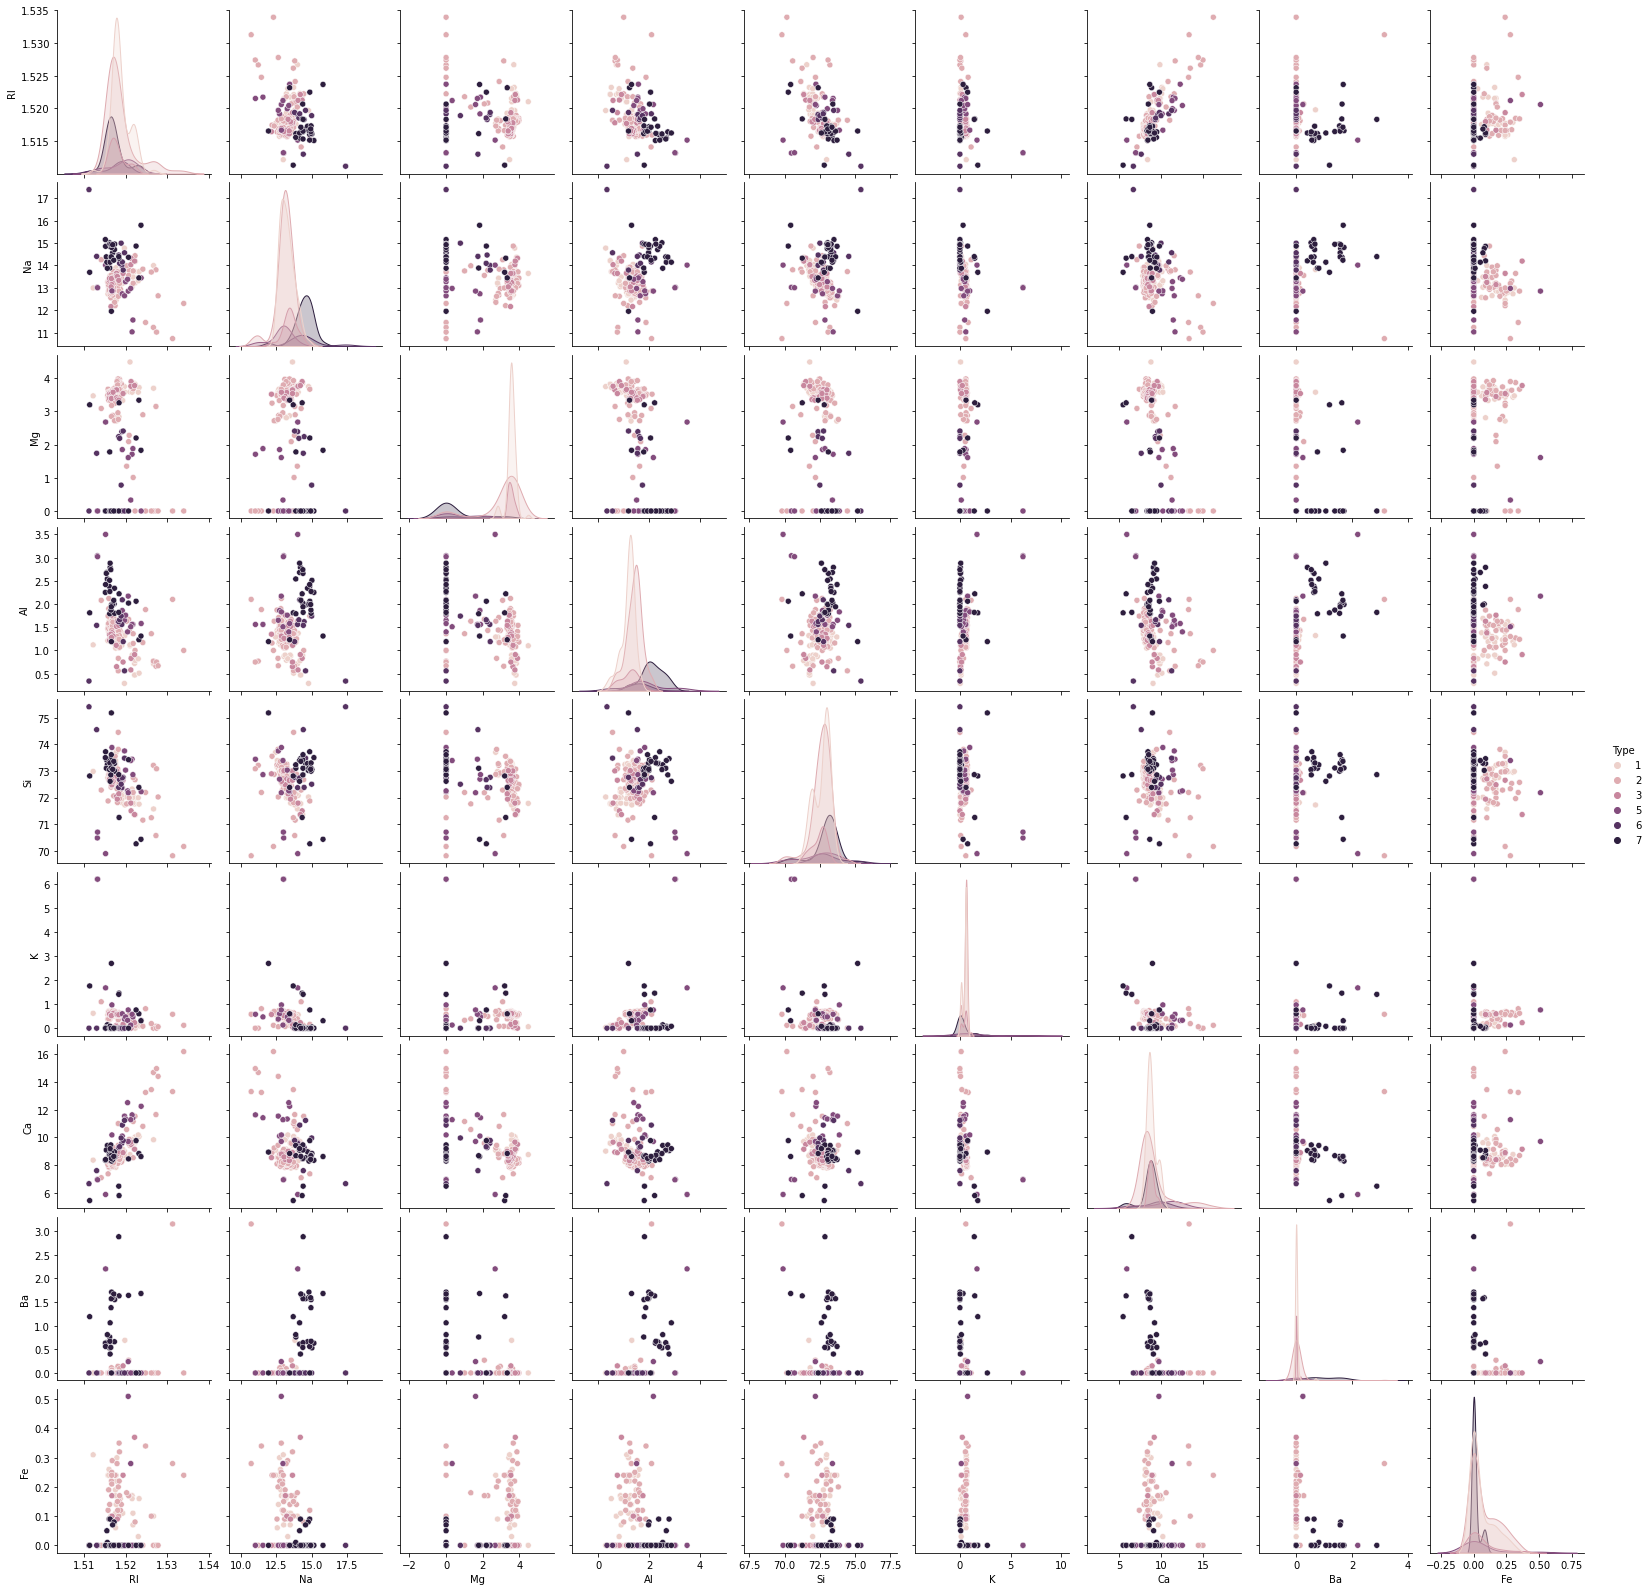

In [ ]:
sns.pairplot(data = dataset.drop("ID",axis = 1),hue = "Type")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


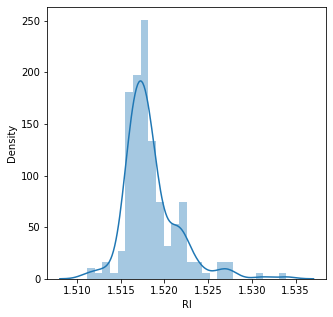

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


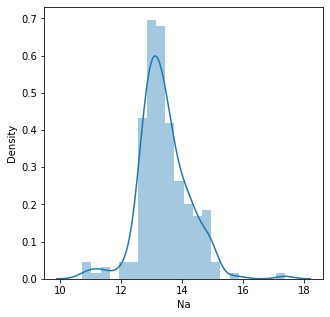

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


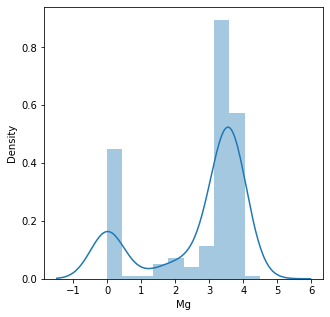

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


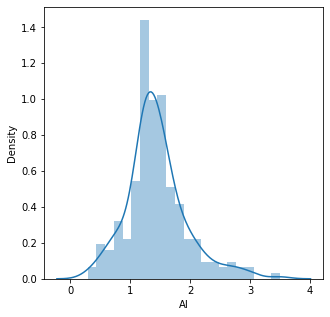

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


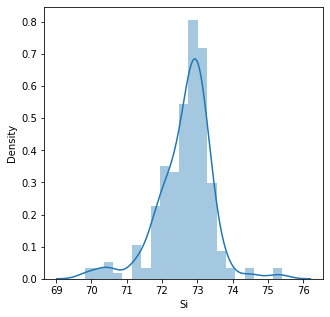

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


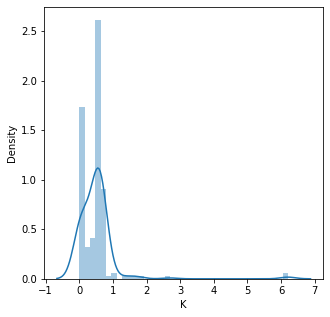

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


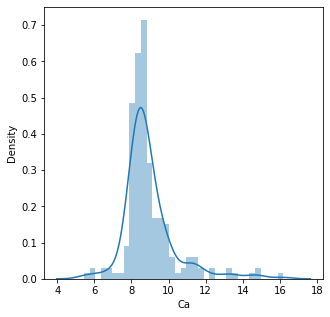

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


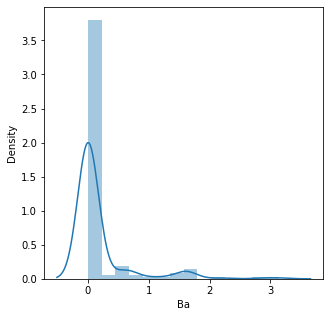

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


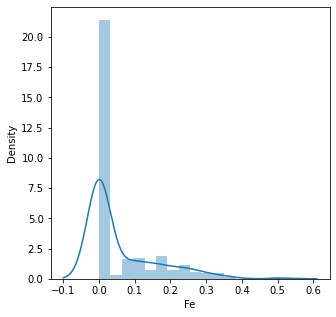

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


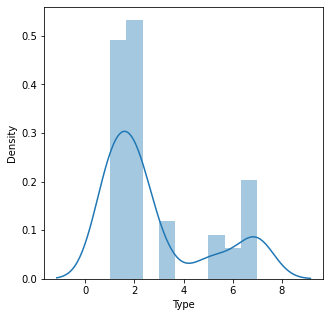

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
for i in columns:
  if(i=="ID"):
    continue
  else:
    sns.distplot(dataset[i])
    plt.show()

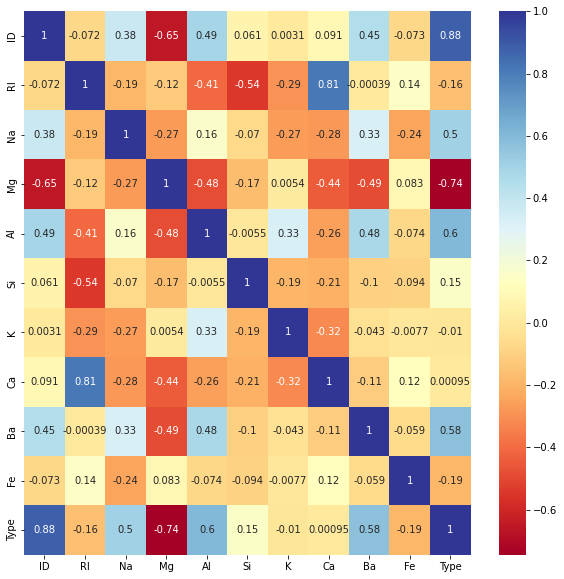

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(dataset.corr(),cmap = "RdYlBu",annot = True)
plt.show()

In [4]:
dataset2 = dataset.drop(["ID","Type"],axis = 1)

### Part a)


In [30]:
X = dataset2.copy()
Y = dataset["Type"]
model = KMeans(n_clusters = 7)
labels = model.fit_predict(X)
labels

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4,
       1, 4, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 6, 6, 6, 3, 3,
       6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 6,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 4, 0, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3,
       4, 4, 4, 4, 2, 2, 3, 3, 2, 0, 0, 1, 4, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [31]:
label_0 = X[labels == 0]
label_1 = X[labels == 1]
label_2 = X[labels == 2]
label_3 = X[labels == 3]
label_4 = X[labels == 4]
label_5 = X[labels == 5]
label_6 = X[labels == 6]
label_i = []
label_i.append(label_0)
label_i.append(label_1)
label_i.append(label_2)
label_i.append(label_3)
label_i.append(label_4)
label_i.append(label_5)
label_i.append(label_6)

36


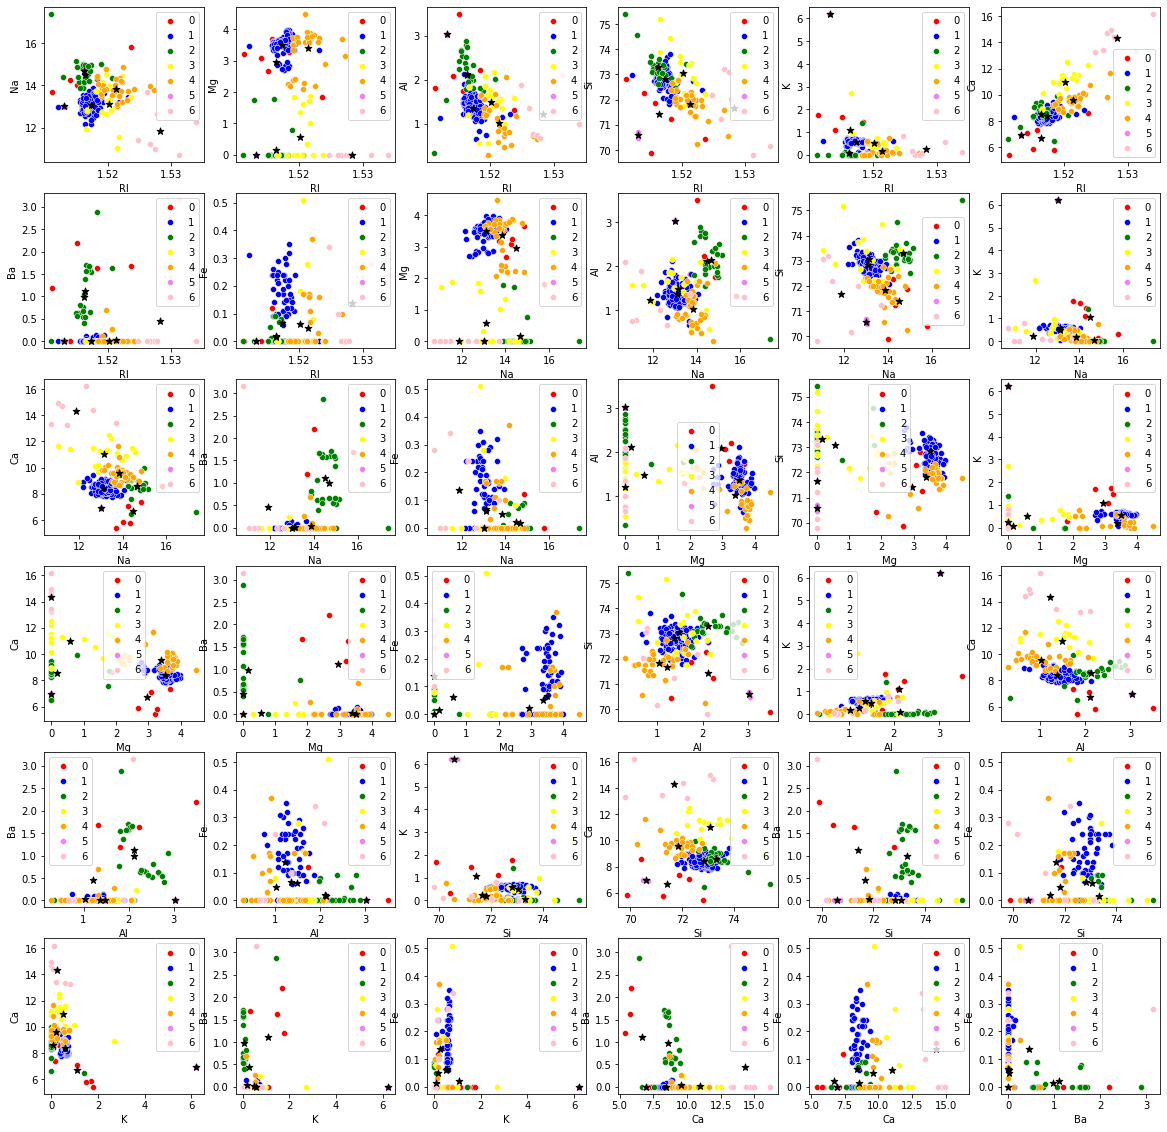

In [32]:
plt.rcParams["figure.figsize"] = (20,20)
# plt.rcParams['figure.constrained_layout.use'] = True
# plt.subplots(layout="constrained")
# plt.rcParams['figure.max_open_warning'] = 50
cols = list(X.columns)
colors = ['red','blue','green','yellow','orange','violet','pink']
cnt = 0
centroids = model.cluster_centers_
# fig, axs = plt.subplots(6,6)
fig = plt.figure(figsize =(20, 20))
# ax = Subplot(fig, 111)
# print(centroids)
# def example_plot(ax):
for j in range(len(cols)):
  for k in range(j,len(cols)):
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(6, 6, cnt)
      for i in range(0,7):
        sns.scatterplot(x = label_i[i][cols[j]], y = label_i[i][cols[k]], color = colors[i],label = i,ax= ax)
      ax.scatter(centroids[:,j],centroids[:,k], marker = "*",s = 50,color = 'black')
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
      ax.legend()
# for ax in axs.flat:
#     example_plot(ax)
print(cnt)
plt.show()

### Part b)

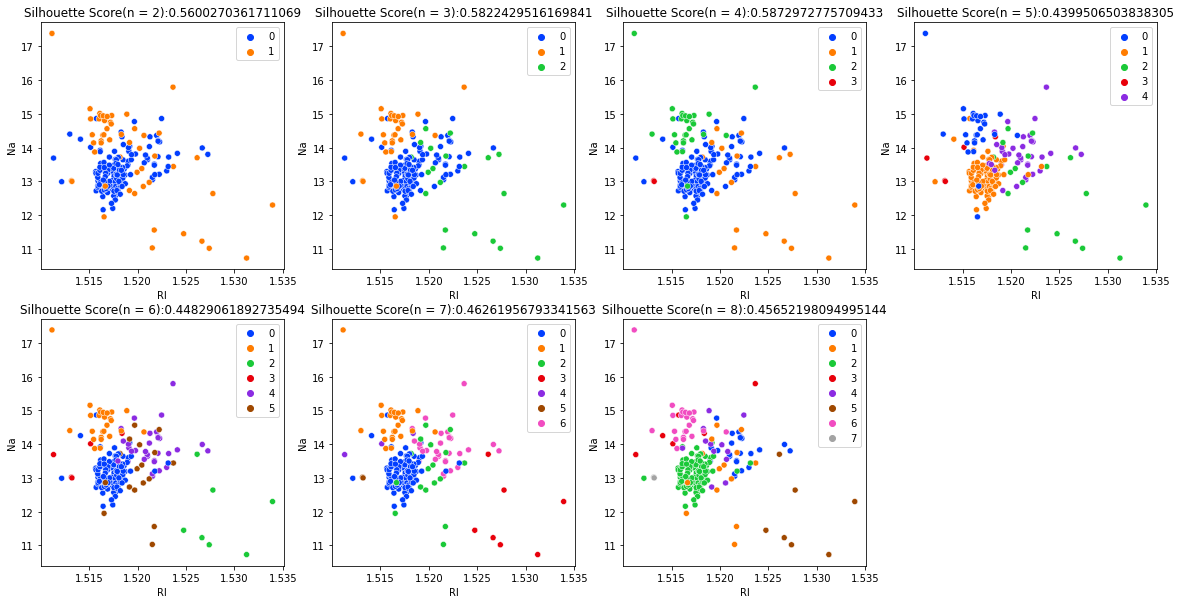

5


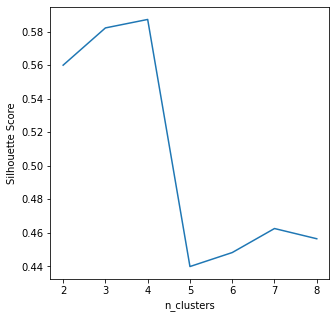

In [33]:
plt.rcParams["figure.figsize"] = (20,10)
plt.figure(figsize = (20, 10))
score_arr = []
arr=[]
for i in range(2,9):
  KMean= KMeans(n_clusters=i,n_init = 10)
  label=KMean.fit_predict(X)
  ax = plt.subplot(2,4,i-1)
  sns.scatterplot(x = X[cols[0]], y =X[cols[1]],hue=label,palette='bright',ax = ax)
  score_arr.append(silhouette_score(X, label))
  arr.append(i)
  # plt.subplot(2,4,i-1)
  plt.title("Silhouette Score(n = "+str(i)+"):"+ str(silhouette_score(X.to_numpy(), label)))
plt.show()
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(arr,score_arr)
plt.ylabel("Silhouette Score")
plt.xlabel("n_clusters")

We can say that for n_clusters if Silhouette score is minimum for that n_cluster value then it is the optimal value of k.

### Part c)

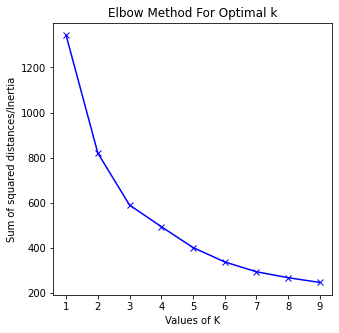

In [34]:
Sum_of_squared_distances = []
for num_clusters in range(1,10) :
 kmeans = KMeans(n_clusters=num_clusters,n_init = 10)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(range(1,10),Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

### Part d)

0.35384615384615387


Text(0, 0.5, 'accuracy')

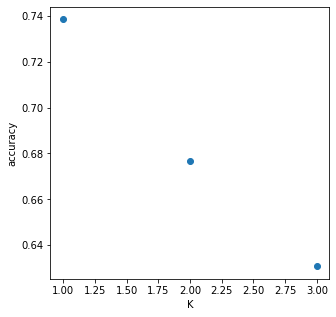

In [59]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.3, random_state=42)
acc_arr = []
for i in range(1,4):
  knn_model = KNN(n_neighbors=i)
  final_model = BC(estimator=knn_model)
  final_model.fit(X_train,Y_train)
  acc_arr.append(final_model.score(X_test,Y_test))
bagging = BC(estimator = SVC())
bagging.fit(X_train,Y_train)
print(bagging.score(X_test,Y_test))
plt.scatter(range(1,4),acc_arr)
plt.xlabel("K")
plt.ylabel("accuracy")

## Problem 2

### Preprocessing

In [ ]:
olive_data = fetch_olivetti_faces()
olive_data

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [ ]:
dataset = pd.DataFrame(data = olive_data.data)
dataset["Class"] = olive_data.target
dataset = dataset.dropna()
dataset

0         1         2         3         4         5         6  \
0    0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1    0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2    0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3    0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4    0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.400826  0.495868  0.570248  0.632231  0.648760  0.640496  0.661157   
396  0.367769  0.367769  0.351240  0.301653  0.247934  0.247934  0.367769   
397  0.500000  0.533058  0.607438  0.628099  0.657025  0.632231  0.657025   
398  0.214876  0.219008  0.219008  0.223140  0.210744  0.202479  0.276859   
399  0.516529  0.462810  0.280992  0.252066  0.247934  0.367769  0.574380   

            7         8         9  ...      4087      4088      4089  \
0    0.677686  0.690083  0.685950  ...  0.669421  0.652893  0.661157   
1    0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760   
2    0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364   
3    0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950   
4    0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.636364  0.665289  0.698347  ...  0.396694  0.264463  0.099174   
396  0.512397  0.574380  0.628099  ...  0.334711  0.289256  0.285124   
397  0.669421  0.673554  0.702479  ...  0.148760  0.152893  0.161157   
398  0.400826  0.487603  0.549587  ...  0.392562  0.367769  0.409091   
399  0.615702  0.661157  0.615702  ...  0.264463  0.293388  0.301653   

         4090      4091      4092      4093      4094      4095  Class  
0    0.475207  0.132231  0.148760  0.152893  0.161157  0.157025      0  
1    0.152893  0.152893  0.152893  0.152893  0.152893  0.152893      0  
2    0.128099  0.148760  0.144628  0.140496  0.148760  0.152893      0  
3    0.727273  0.743802  0.764463  0.752066  0.752066  0.739669      0  
4    0.177686  0.177686  0.177686  0.177686  0.173554  0.173554      0  
..        ...       ...       ...       ...       ...       ...    ...  
395  0.181818  0.243802  0.247934  0.161157  0.157025  0.136364     39  
396  0.338843  0.404959  0.458678  0.487603  0.512397  0.549587     39  
397  0.161157  0.173554  0.157025  0.177686  0.148760  0.190083     39  
398  0.479339  0.524793  0.545455  0.574380  0.590909  0.603306     39  
399  0.293388  0.322314  0.322314  0.359504  0.355372  0.384298     39  

[400 rows x 4097 columns]

### Part a) and b)

In [ ]:
class Kmeans_scratch_ver2:
  def __init__(self,k,init_centres = [],max_iter = 100):
    self._k = k
    self._centres = init_centres
    self._max_iter = max_iter
    
  def _euclidean_distance(self,point,dataset):
    dis = np.sqrt(np.sum((point-dataset)**2,axis = 1))
    return dis

  def fit(self,X):

    n_provided_centres = len(self._centres)
    if(n_provided_centres == 0):
      ind = np.random.choice(range(len(X)), size=1)
      self._centres = X[ind]
      n_provided_centres = 1

    if(n_provided_centres != self._k):

      for _ in range(self._k - n_provided_centres):

        
        dists = np.sum([self._euclidean_distance(centroid,X) for centroid in self._centres],axis = 0)
        
        dists /= np.sum(dists)
        
        new_centroid_idx = np.random.choice(range(len(X)), size=1, p=dists)[0] 
        self._centres = np.r_[self._centres,[X[new_centroid_idx]]]
    

    for i in range(self._max_iter):
      
      clusters = [[] for _ in range(self._k)]
      for x in X:
        dist = self._euclidean_distance(x,self._centres)
        indx = np.argmin(dist)
        clusters[indx].append(x)

      prev_centroids = self._centres
      self._centres = [np.mean(cluster,axis = 0) for cluster in clusters] 

      for i,centre in enumerate(self._centres):
        if(np.isnan(centre).any()):
          self._centres[i] = prev_centroids[i]
      
      if(np.allclose(self._centres, prev_centroids)):
        break

  def predict(self,X):
    self.centres_of_points = []
    self.centres_indx_of_points = []
    for x in X:
      dists = self._euclidean_distance(x,self._centres)
      centroid_ind = np.argmin(dists)
      self.centres_of_points.append(self._centres[centroid_ind])
      self.centres_indx_of_points.append(centroid_ind)
    return self.centres_of_points,self.centres_indx_of_points

  def count_of_points(self):
    elements_count = {}
    for element in self.centres_indx_of_points:
      if element in elements_count:
          elements_count[element] += 1
      else:
          elements_count[element] = 1
    return elements_count


### Part c)

In [ ]:
new_ind = np.random.choice(range(len(olive_data.data)), size=40)
centre = olive_data.data[new_ind]
model = Kmeans_scratch_ver2(k=40,init_centres = centre)
model.fit(olive_data.data)
centres,centres_ind = model.predict(olive_data.data)
print(model.count_of_points())

{2: 19, 20: 6, 10: 11, 21: 17, 18: 11, 15: 7, 14: 8, 13: 2, 26: 7, 34: 21, 28: 18, 30: 5, 16: 26, 19: 42, 8: 9, 24: 14, 3: 7, 35: 8, 6: 3, 39: 7, 9: 3, 29: 5, 0: 15, 33: 4, 7: 16, 5: 4, 17: 4, 4: 7, 27: 4, 36: 8, 37: 8, 22: 1, 38: 9, 1: 17, 12: 6, 31: 4, 32: 13, 25: 9, 23: 10, 11: 5}


### Part d)

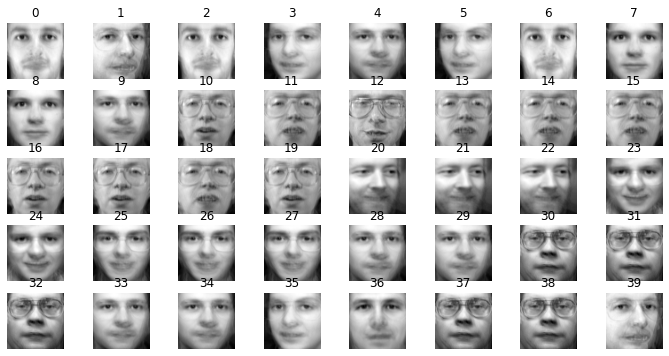

In [ ]:
centres = np.array(centres)
centres  = centres.reshape((-1,64,64))
fig, axes = plt.subplots(5, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(centres[i], cmap='gray')
    ax.set_title(i)
    ax.axis('off')
plt.show()

### Part e)

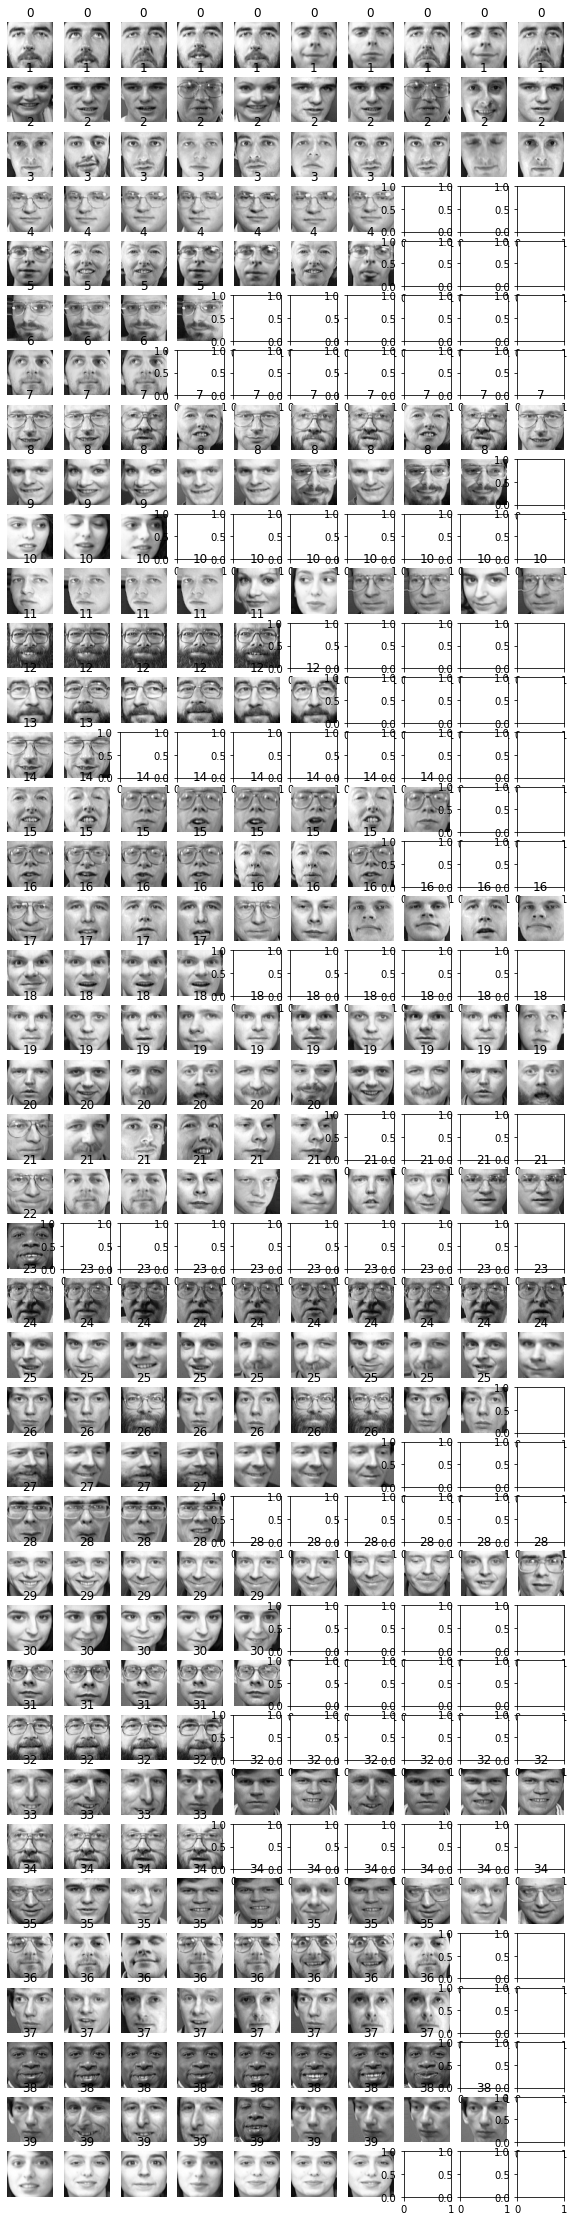

In [ ]:
# print(centres_ind)
# cluster_indices = np.where(centres_ind == i)[0]

fig, axes = plt.subplots(40, 10, figsize=(10, 40))
centres_ind =np.array(centres_ind)
for i in range(40):
    cluster_indices = np.where(centres_ind == i)[0]
    sample_indices = np.random.choice(cluster_indices,10)
    if(len(cluster_indices) < 10):
      sample_indices = np.random.choice(cluster_indices,len((cluster_indices)))
    for j, index in enumerate(sample_indices):
        img = olive_data.images[index]
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        axes[i,j].set_title(str(i))


plt.show()


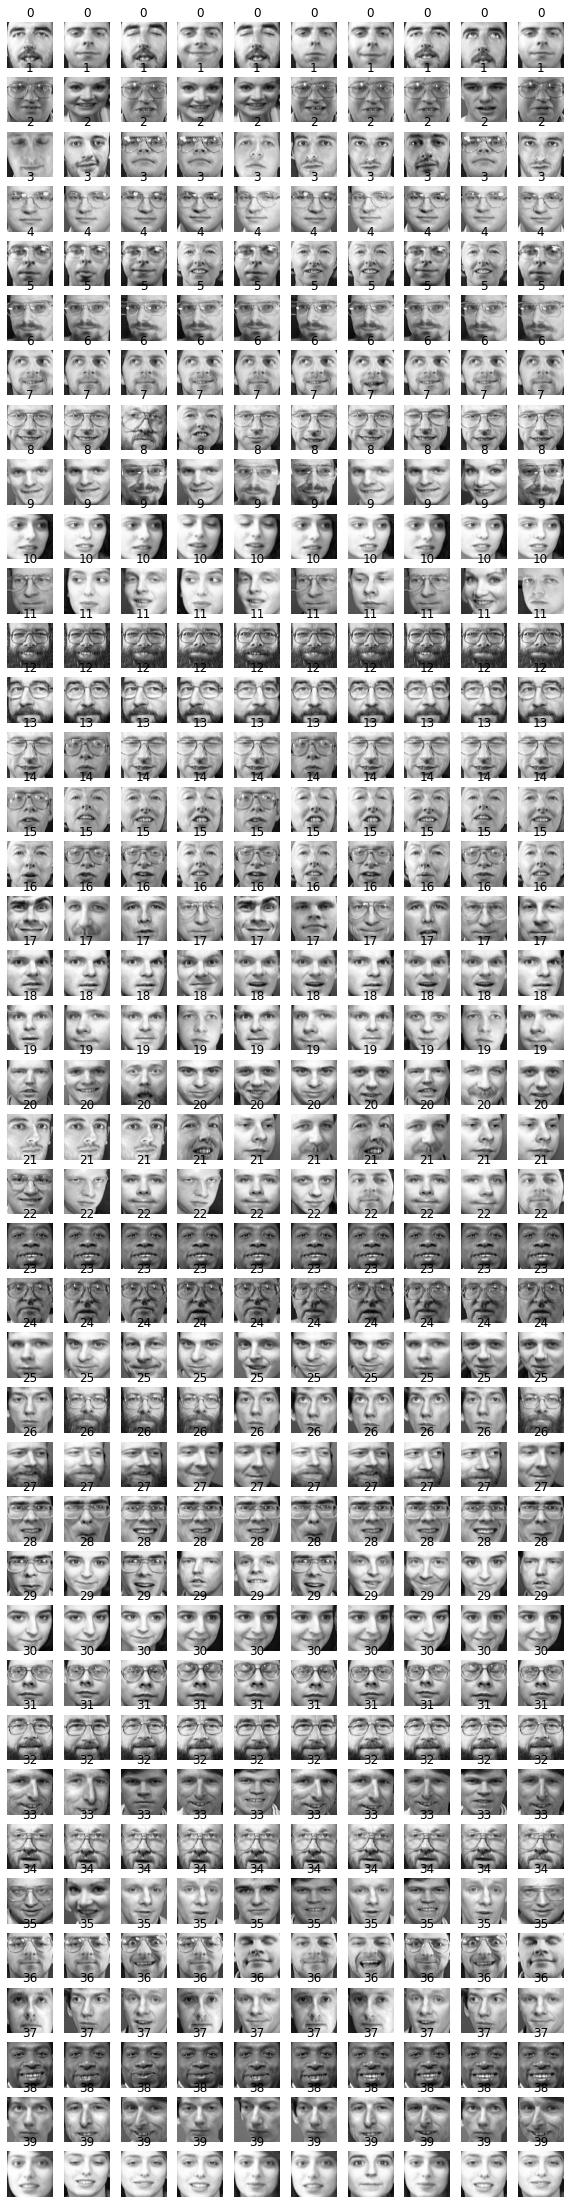

In [ ]:
fig, axes = plt.subplots(40, 10, figsize=(10, 40))
centres_ind =np.array(centres_ind)
for i in range(40):
    cluster_indices = np.where(centres_ind == i)[0]
    sample_indices =np.random.choice(cluster_indices,10)
    for j, index in enumerate(sample_indices):
        img = olive_data.images[index]
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        axes[i,j].set_title(str(i))


plt.show()

### Part f)

{0: 14, 17: 16, 37: 21, 39: 9, 1: 10, 2: 13, 30: 14, 4: 23, 3: 11, 22: 21, 29: 19, 5: 10, 6: 7, 7: 5, 8: 13, 9: 3, 11: 6, 10: 15, 12: 11, 13: 10, 14: 5, 15: 2, 16: 4, 18: 5, 19: 4, 21: 10, 24: 10, 23: 17, 26: 10, 27: 10, 28: 9, 20: 5, 31: 10, 32: 10, 33: 10, 34: 6, 35: 2, 36: 5, 25: 5, 38: 10}


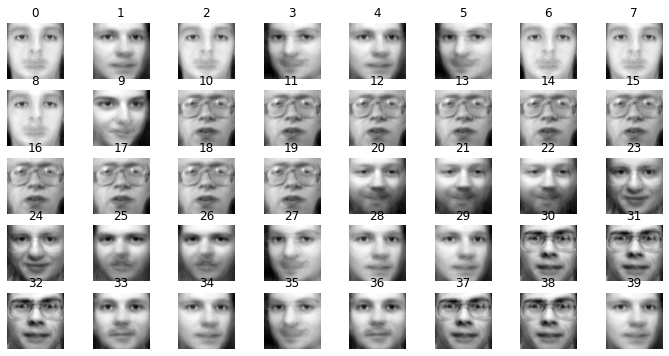

In [ ]:
class_init = np.concatenate([olive_data.data[np.where(olive_data.target == i)[0][:1]] for i in range(40)])
model_img = Kmeans_scratch_ver2(k=40,init_centres = class_init)
model_img.fit(olive_data.data)
centres,centres_ind = model_img.predict(olive_data.data)
centres = np.array(centres)
print(model_img.count_of_points())
class_centers = centres.reshape((-1, 64, 64))


# Plot cluster centers
fig, axes = plt.subplots(5, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(class_centers[i], cmap='gray')
    ax.axis('off')
    ax.set_title(i)
plt.show()

### Part g)

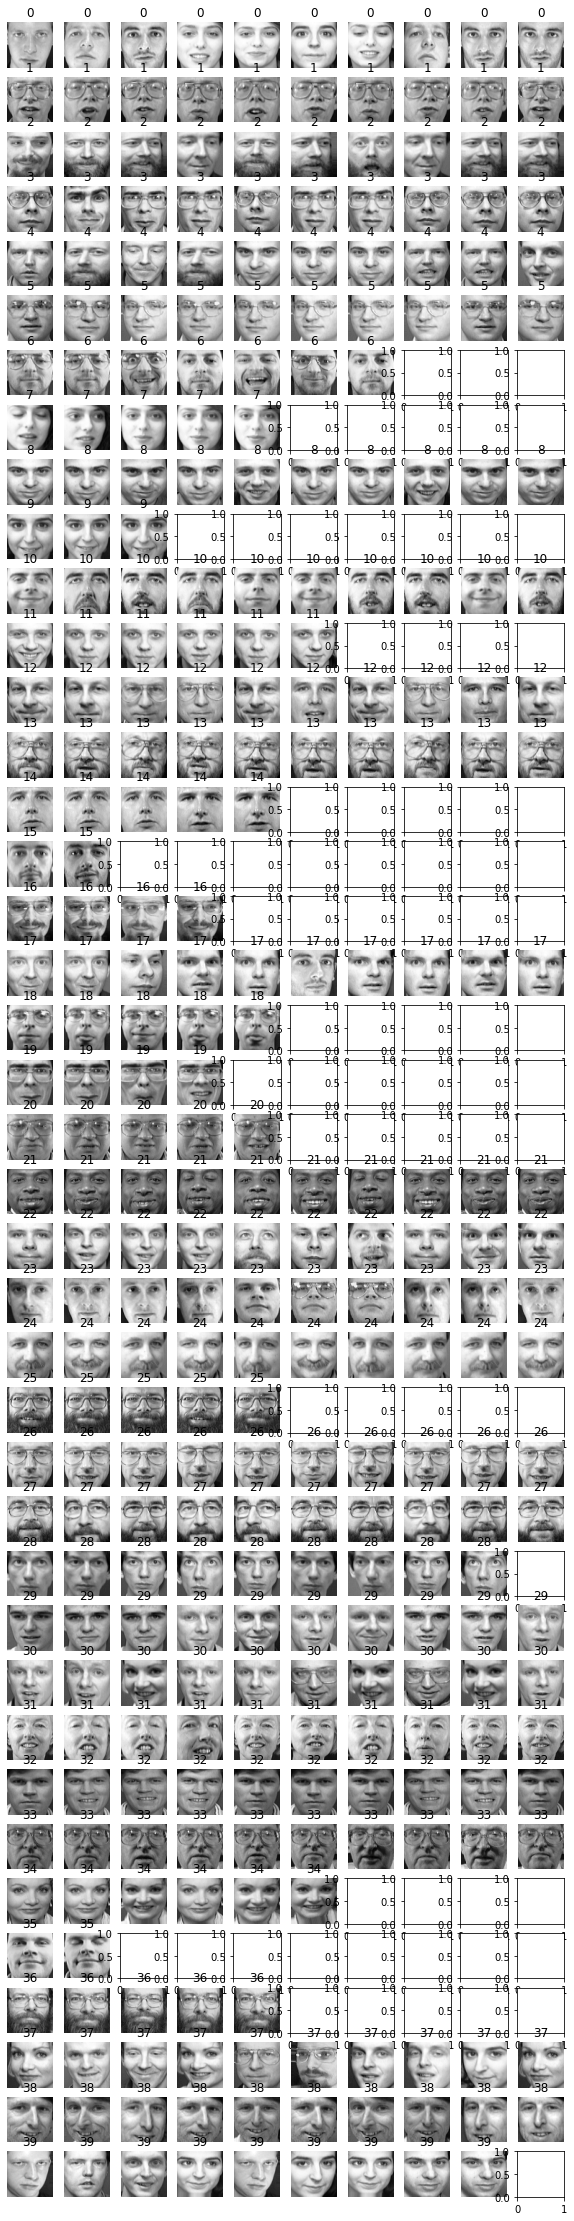

In [ ]:
fig, axes = plt.subplots(40, 10, figsize=(10, 40))
centres_ind =np.array(centres_ind)
for i in range(40):
    cluster_indices = np.where(centres_ind == i)[0]
    sample_indices = np.random.choice(cluster_indices, 10)
    if(len(cluster_indices) < 10):
      sample_indices = np.random.choice(cluster_indices, len(cluster_indices))
    for j, index in enumerate(sample_indices):
        img = olive_data.images[index]
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        axes[i,j].set_title(str(i))
plt.show()

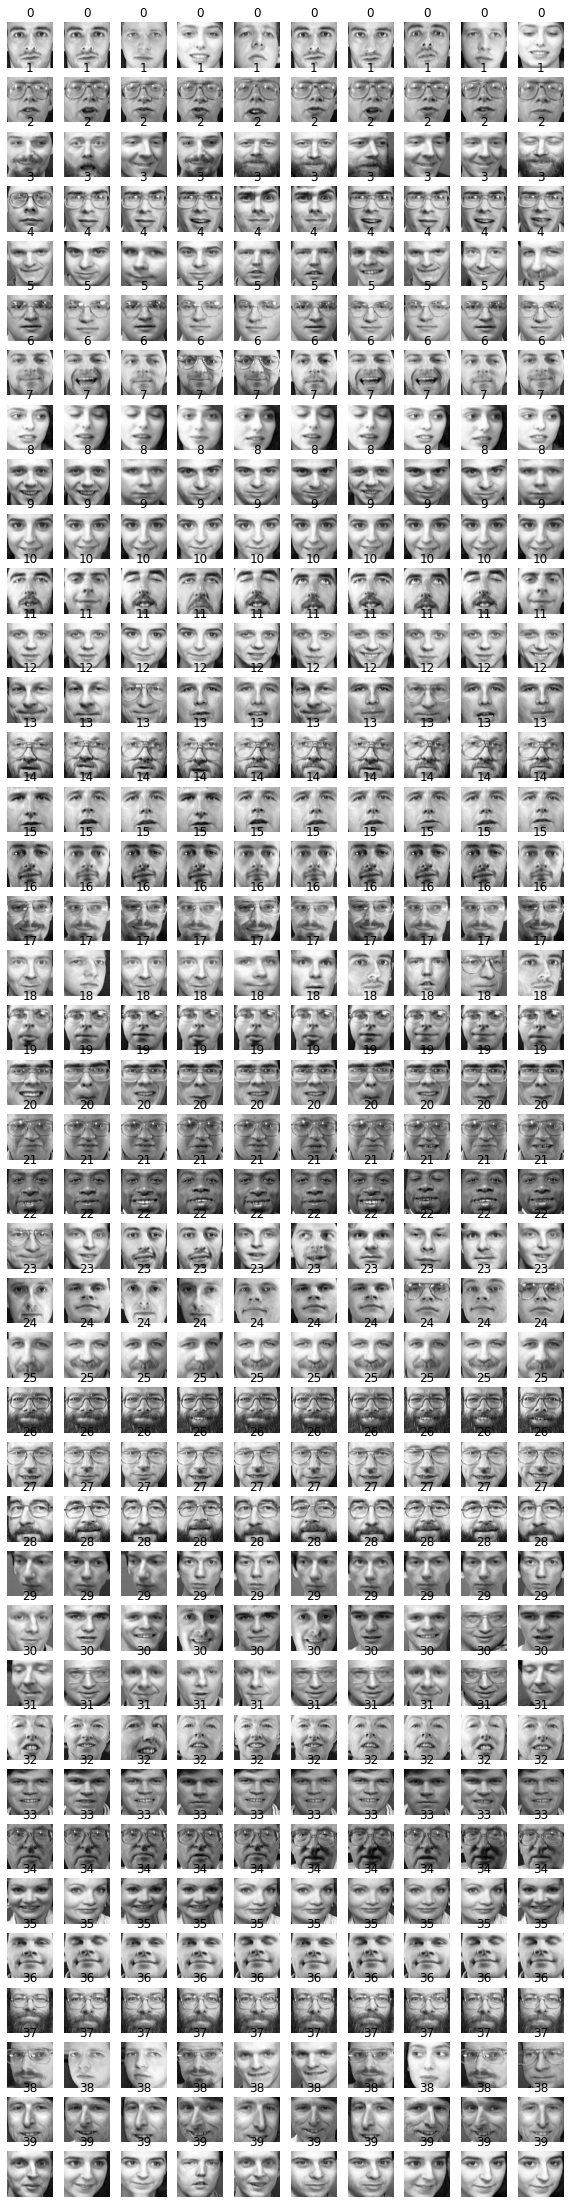

In [ ]:
fig, axes = plt.subplots(40, 10, figsize=(10, 40))
centres_ind =np.array(centres_ind)
for i in range(40):
    cluster_indices = np.where(centres_ind == i)[0]
    sample_indices = np.random.choice(cluster_indices, 10)
    for j, index in enumerate(sample_indices):
        img = olive_data.images[index]
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        axes[i,j].set_title(str(i))
plt.show()

### Part h)

In [ ]:
distances = np.linalg.norm(olive_data.data[:, np.newaxis, :] - model.centres_of_points, axis=2)
sse1 = np.sum(np.min(distances, axis=1)**2)

# Compute SSE for new KMeans model
class_distances = np.linalg.norm(olive_data.data[:, np.newaxis, :] - model_img.centres_of_points, axis=2)
sse2 = np.sum(np.min(class_distances, axis=1)**2)

print(f"SSE for original KMeans model: {sse1}")
print(f"SSE for new KMeans model: {sse2}")

SSE for original KMeans model: 13083.177734375
SSE for new KMeans model: 12182.69140625


## Problem 3

### Part a)

In [60]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
dataset

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

In [61]:
copyset = dataset.copy()
copyset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [62]:
scaled_dataset = StandardScaler().fit_transform(copyset)
scaled_dataset = pd.DataFrame(data = scaled_dataset, columns = dataset.columns)
scaled_dataset

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1    1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2    1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3   -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4    1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   
..        ...       ...       ...       ...       ...       ...   
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441   
439 -0.690297  0.590668 -0.729307 -0.555924 -0.573227 -0.620094   

     Detergents_Paper  Delicassen  
0           -0.043569   -0.066339  
1            0.086407    0.089151  
2            0.133232    2.243293  
3           -0.498588    0.093411  
4           -0.231918    1.299347  
..                ...         ...  
435         -0.566831    0.241091  
436         -0.585519    0.291501  
437          2.511218    0.121456  
438         -0.569770    0.213046  
439         -0.504888   -0.522869  

[440 rows x 8 columns]

### Part b)

In [63]:
covariance_mat = scaled_dataset.cov()
max_val = 0
features_1 = ""
features_2 = ""
cols = scaled_dataset.columns
for i in list(cols):
  for j in list(cols):
    if( i == j):
      continue
    else:
      if(max_val < abs(covariance_mat[i][j])):
        max_val = abs(covariance_mat[i][j])
        features_1 = i
        features_2 = j
print(features_1,features_2,max_val)
covariance_mat



Grocery Detergents_Paper 0.9267469338858263


Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.002278  0.062169 -0.169557  0.461770  0.610179 -0.202506   
Region            0.062169  1.002278  0.055413  0.032361  0.007713 -0.021092   
Fresh            -0.169557  0.055413  1.002278  0.100739 -0.011881  0.346669   
Milk              0.461770  0.032361  0.100739  1.002278  0.729994  0.124276   
Grocery           0.610179  0.007713 -0.011881  0.729994  1.002278 -0.040284   
Frozen           -0.202506 -0.021092  0.346669  0.124276 -0.040284  1.002278   
Detergents_Paper  0.637475 -0.001486 -0.102185  0.663323  0.926747 -0.131825   
Delicassen        0.056139  0.045315  0.245247  0.407294  0.205965  0.391838   

                  Detergents_Paper  Delicassen  
Channel                   0.637475    0.056139  
Region                   -0.001486    0.045315  
Fresh                    -0.102185    0.245247  
Milk                      0.663323    0.407294  
Grocery                   0.926747    0.205965  
Frozen                   -0.131825    0.391838  
Detergents_Paper          1.002278    0.069449  
Delicassen                0.069449    1.002278

<AxesSubplot:xlabel='Grocery', ylabel='Detergents_Paper'>

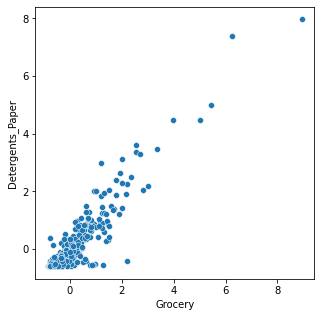

In [64]:
sns.scatterplot(x = features_1,y=features_2,data = scaled_dataset)

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Grocery'>

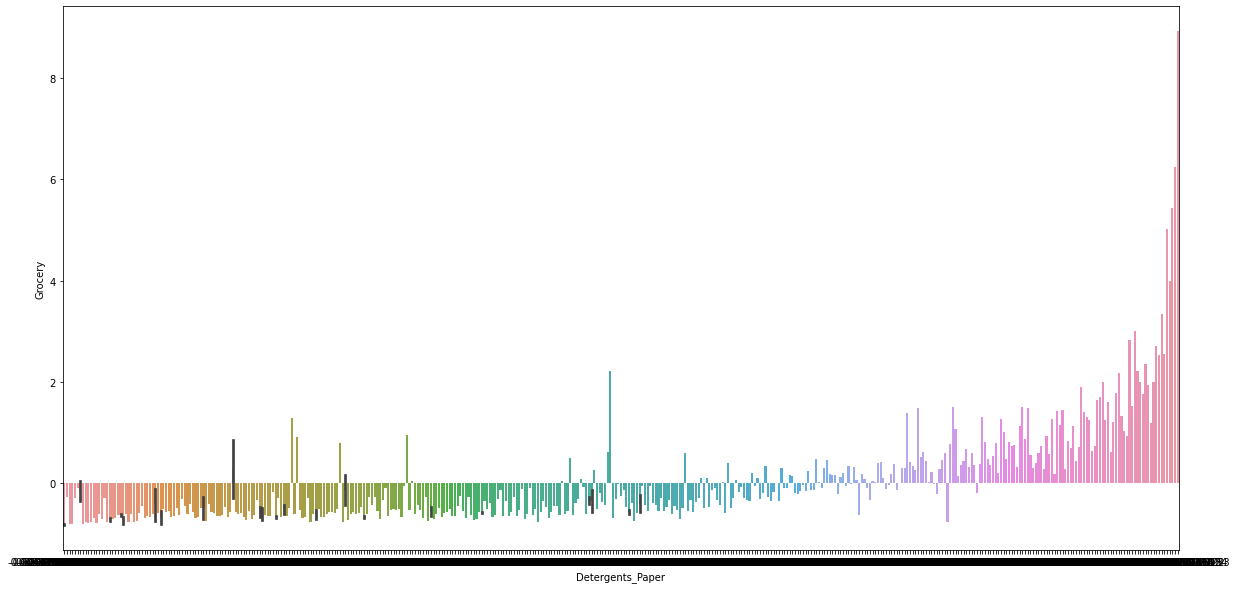

In [65]:
plt.rcParams["figure.figsize"] = (20,10)
sns.barplot(x = features_2,y=features_1,data = scaled_dataset)

### Part c)

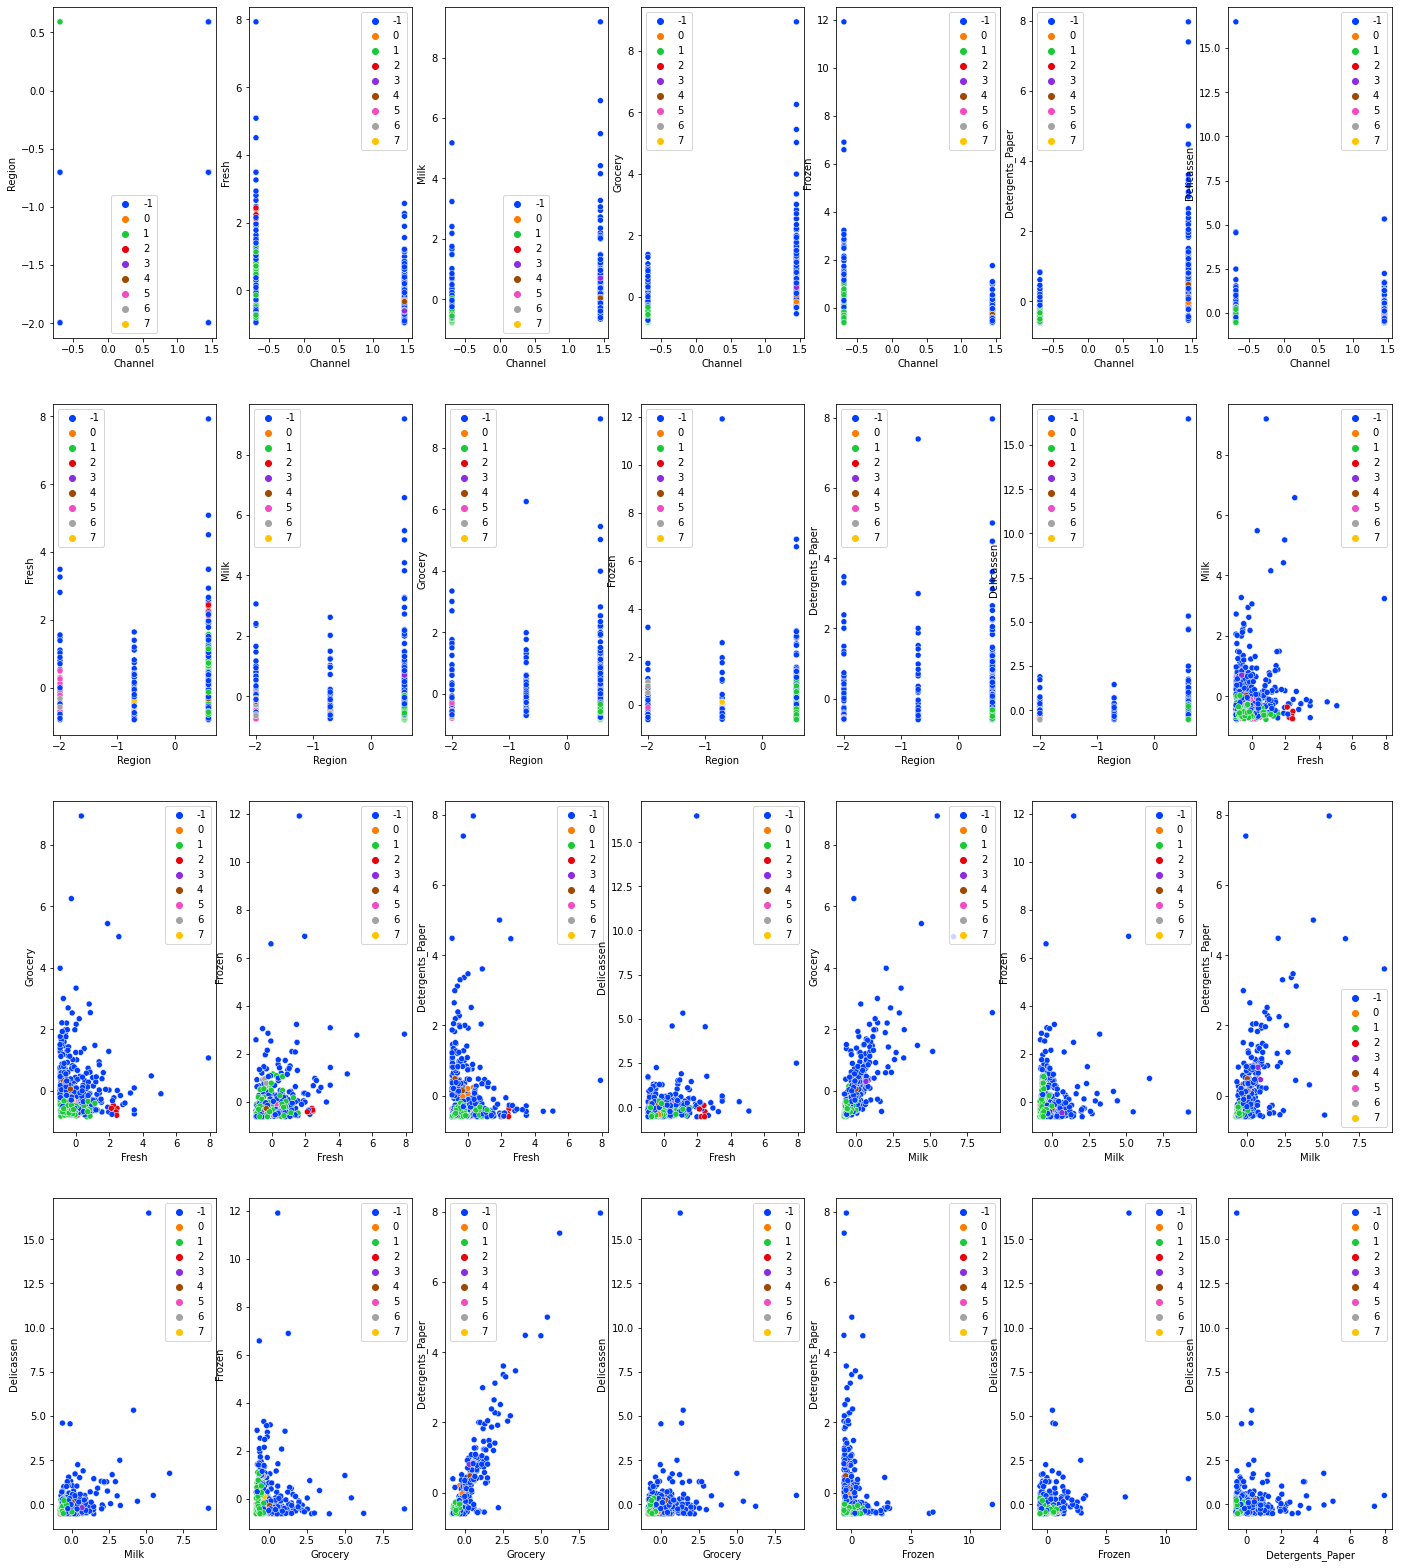

In [66]:
model_dbscan = DBSCAN()
clusters = model_dbscan.fit_predict(scaled_dataset)
fig = plt.figure(figsize =(24, 28))
cnt = 0
for j in range(len(cols)):
  for k in range(j,len(cols)):
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(4, 7, cnt)
      sns.scatterplot(x = scaled_dataset[cols[j]], y = scaled_dataset[cols[k]],hue = clusters,palette='bright',ax= ax)
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

### Part d)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


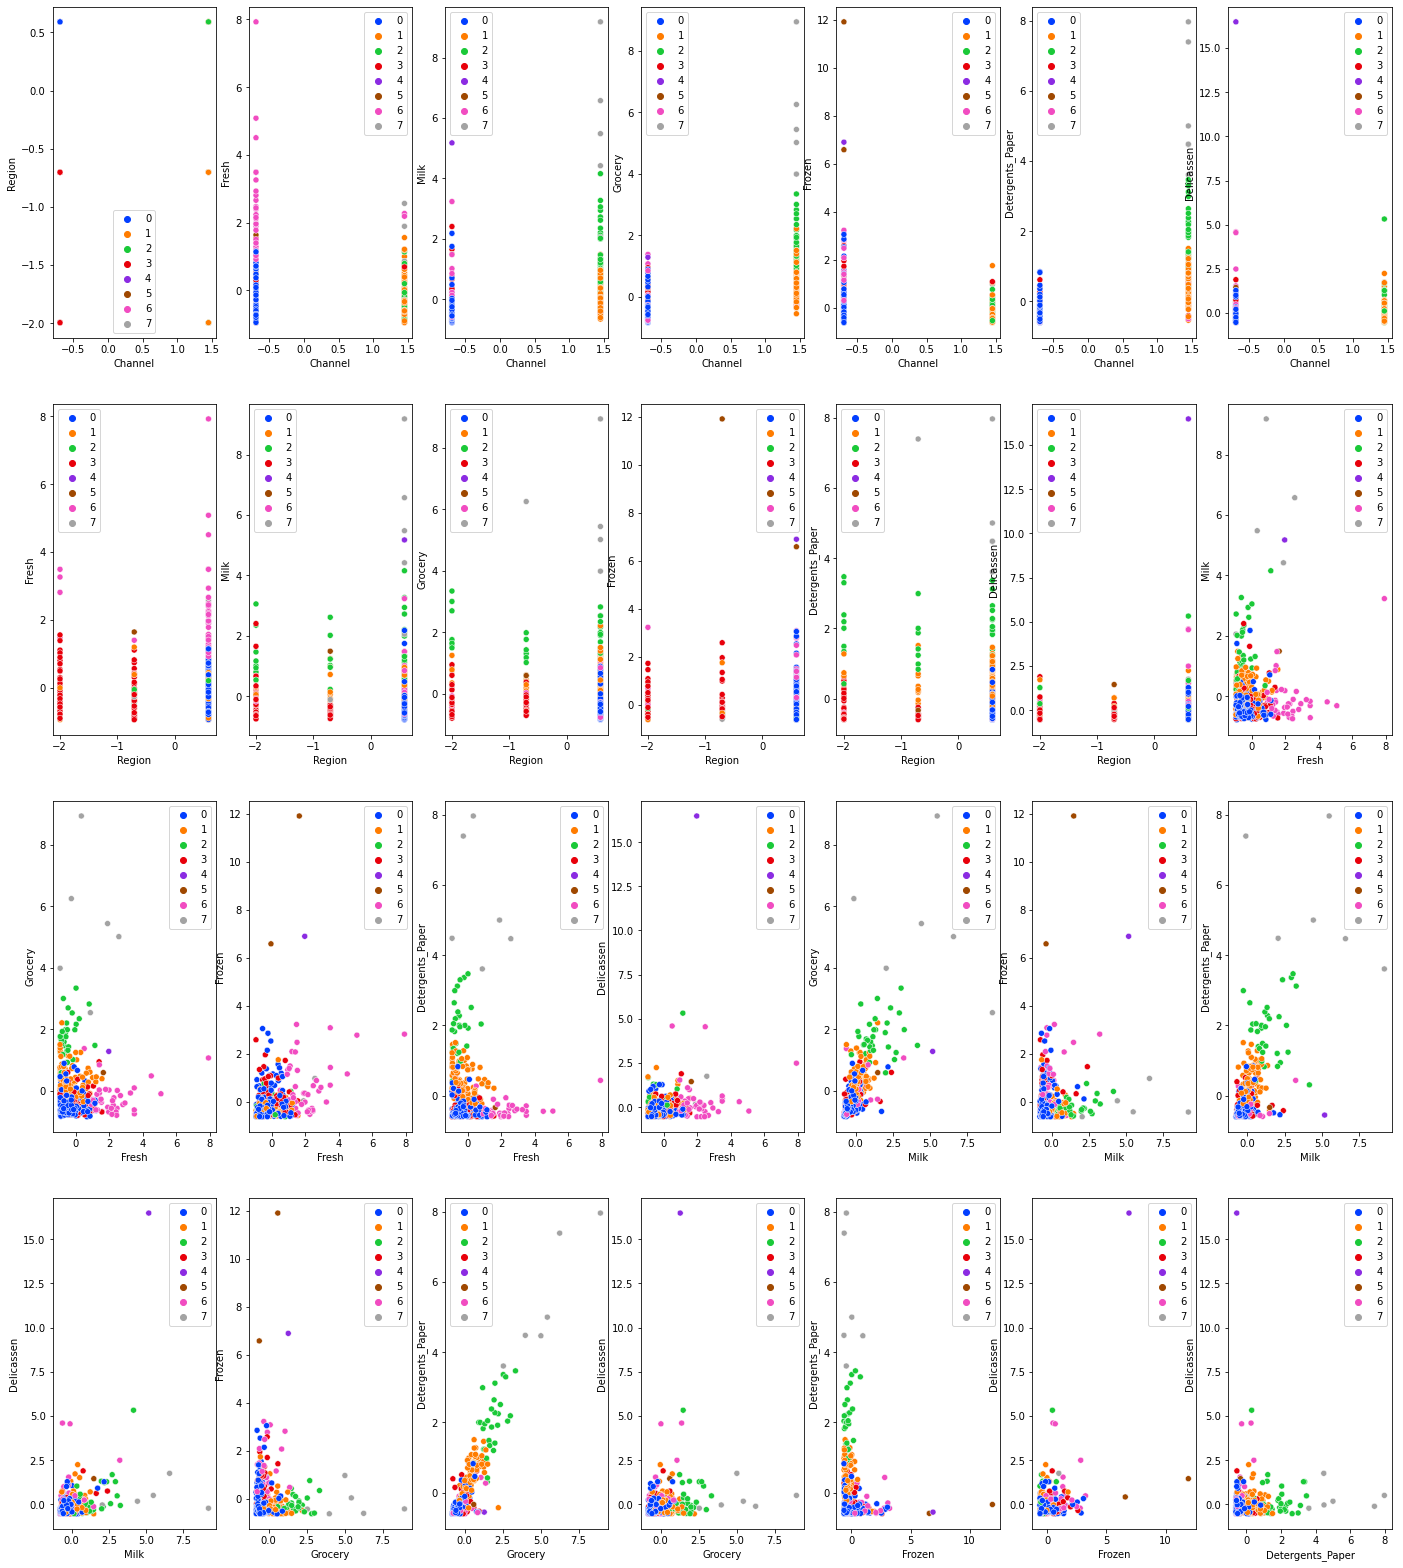

In [71]:
models_kmeans = KMeans()
clusters = models_kmeans.fit_predict(scaled_dataset)
fig = plt.figure(figsize =(24, 28))
cnt = 0
for j in range(len(cols)):
  for k in range(j,len(cols)):
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(4, 7, cnt)
      sns.scatterplot(x = scaled_dataset[cols[j]], y = scaled_dataset[cols[k]],hue = clusters,palette='bright',ax= ax)
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

### Part e)

In [4]:
dataset_moons = make_moons(n_samples = 2000,noise = 0.2)
df_moons = pd.DataFrame(data = dataset_moons[0],columns = ["X1","X2"])
df_moons

X1        X2
0    -0.424987  0.887616
1     0.258625  0.950328
2     1.601542  0.034732
3     0.786298  1.067016
4     0.256610  0.015069
...        ...       ...
1995  1.509669 -0.003357
1996 -0.528029  0.984474
1997  0.300734  1.019299
1998 -1.142875  0.056909
1999 -1.209411  0.839095

[2000 rows x 2 columns]

<AxesSubplot:xlabel='X1', ylabel='X2'>

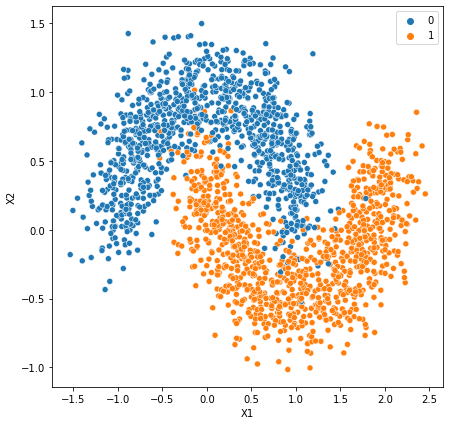

In [6]:
plt.rcParams["figure.figsize"] = (7,7)
sns.scatterplot(x = "X1" , y = "X2",data = df_moons,hue = dataset_moons[1])

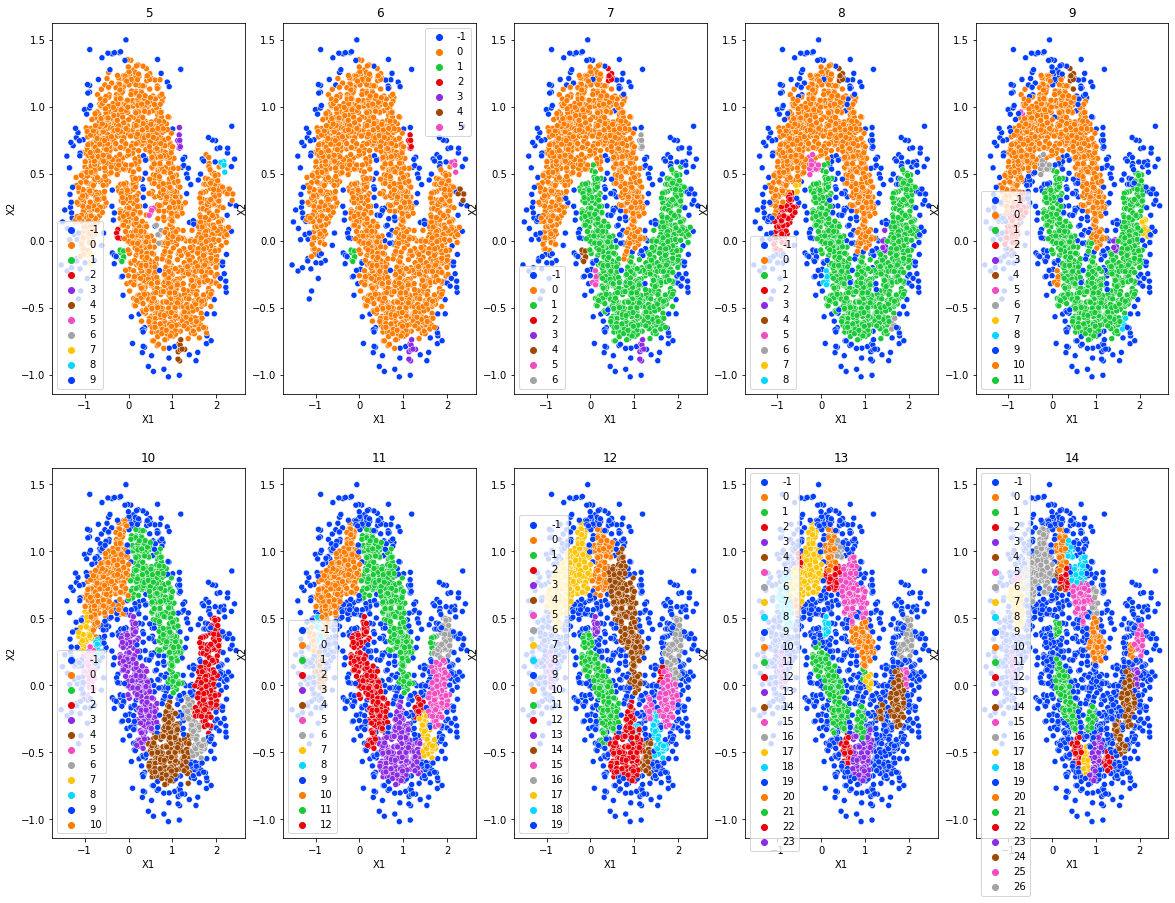

In [8]:
fig = plt.figure(figsize =(20, 15))
for i in range(5,15):
  model_dbscan_2 = DBSCAN(eps=0.08 ,min_samples=i)
  cols = df_moons.columns
  clusters = model_dbscan_2.fit_predict(df_moons)
  # print(clusters)
  for j in range(len(cols)):
    for k in range(j,len(cols)):
      if(j == k):
        continue
      else:
        ax = fig.add_subplot(2, 5, i-4)
        sns.scatterplot(x = df_moons[cols[j]], y = df_moons[cols[k]],hue = clusters,palette='bright')
        plt.xlabel(cols[j])
        plt.ylabel(cols[k])
        plt.title(str(i))
plt.show()

[1 1 0 ... 1 1 1]


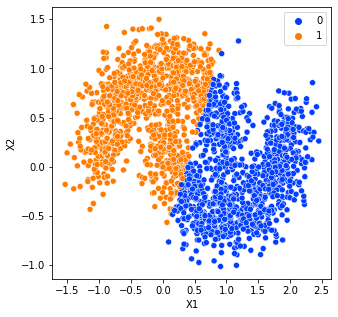

In [9]:
model_kmeans_2 = KMeans(n_clusters = 2,n_init = 10)
cols = df_moons.columns
clusters = model_kmeans_2.fit_predict(df_moons)
print(clusters)
fig = plt.figure(figsize =(5, 5))
cnt = 0
for j in range(len(cols)):
  for k in range(j,len(cols)):
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(1, 1, cnt)
      sns.scatterplot(x = df_moons[cols[j]], y = df_moons[cols[k]],hue = clusters,palette='bright',ax= ax)
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()